In [ ]:
import pandas as pd
import numpy

Download the dataset

In [ ]:
#install the kaggle api so that we can import the data directly
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  #kaggle.json file

#set the permissions
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c titanic
!unzip titanic.zip


  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 39.0MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
#load and preview the data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#define the column names
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet_Text']

df = pd.read_csv('twitter_training.csv', names=column_names, header=None)

# Save the DataFrame back to CSV with the column names
df.to_csv('twitter_training_final.csv', index=False)

train_data =


Check for missing values in dataset and see which rows are affected

In [ ]:
missing_values = train_data.isnull().sum()

# display the columns with missing values
print(missing_values[missing_values > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [ ]:
#perform median imputation for the 'Age' column
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

<ipython-input-7-1ae34da8ea05>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-7-1ae34da8ea05>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
#extract the first letter of the cabin for the deck and replaced all that is null by unknown
train_data['Deck'] = train_data['Cabin'].str[0]
train_data['Deck'].fillna('Unknown', inplace=True)
train_data.drop('Cabin', axis = 1,  inplace=True)

test_data['Deck'] = test_data['Cabin'].str[0]
test_data['Deck'].fillna('Unknown', inplace=True)
test_data.drop('Cabin', axis = 1,  inplace=True)

train_data.head(10)

<ipython-input-8-a3475ed06379>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Deck'].fillna('Unknown', inplace=True)
<ipython-input-8-a3475ed06379>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Unknown
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Unknown
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Unknown


In [ ]:
#impute missing values in 'Embarked' with the most frequent values
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)


<ipython-input-9-6c20a1d67862>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
<ipython-input-9-6c20a1d67862>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
#check if all missing values have been handled
missing_values = train_data.isnull().sum()

# display the columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


Visualize the different types of data found in the columns and convert them accordingly

In [ ]:
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Deck            object
dtype: object


In [ ]:
#drop PassengerId in both train and test data as it is not needed
train_data = train_data.drop('PassengerId', axis=1)
test_data = test_data.drop('PassengerId', axis=1)

train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Unknown
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Unknown
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Unknown


In [ ]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Unknown
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Unknown
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Unknown
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Unknown
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Unknown


In [ ]:
#convert the Sex, Embarked into categorical data
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')

test_data['Sex'] = test_data['Sex'].astype('category')
test_data['Embarked'] = test_data['Embarked'].astype('category')

print(train_data.dtypes)

Survived       int64
Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked    category
Deck          object
dtype: object


Basic description analysis for numerical variables

In [ ]:
numerical_stats = train_data.describe()
print(numerical_stats)

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.361582    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.019697    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   22.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   35.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
mode_values = train_data.mode().iloc[0]
print("Mode values for numerical variables:")
print(mode_values)

Mode values for numerical variables:
Survived                    0.0
Pclass                      3.0
Name        Abbing, Mr. Anthony
Sex                        male
Age                        28.0
SibSp                       0.0
Parch                       0.0
Ticket                     1601
Fare                       8.05
Embarked                      S
Deck                    Unknown
Name: 0, dtype: object


In [ ]:
# select only numerical columns
numerical_columns = train_data.select_dtypes(include=['number'])

#calculate the median for each numerical column
medians = numerical_columns.median()
print("Medians for numerical columns:")
print(medians)

#variance for numerical variables
variances = numerical_columns.var()
print("\nVariances for numerical columns:")
print(variances)

#skewness for numerical variables
skewness = numerical_columns.skew()
print("\nSkewness for numerical columns:")
print(skewness)

Medians for numerical columns:
Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

Variances for numerical columns:
Survived       0.236772
Pclass         0.699015
Age          169.512498
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

Skewness for numerical columns:
Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64



Visualizations to explore the distribution of numerical variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

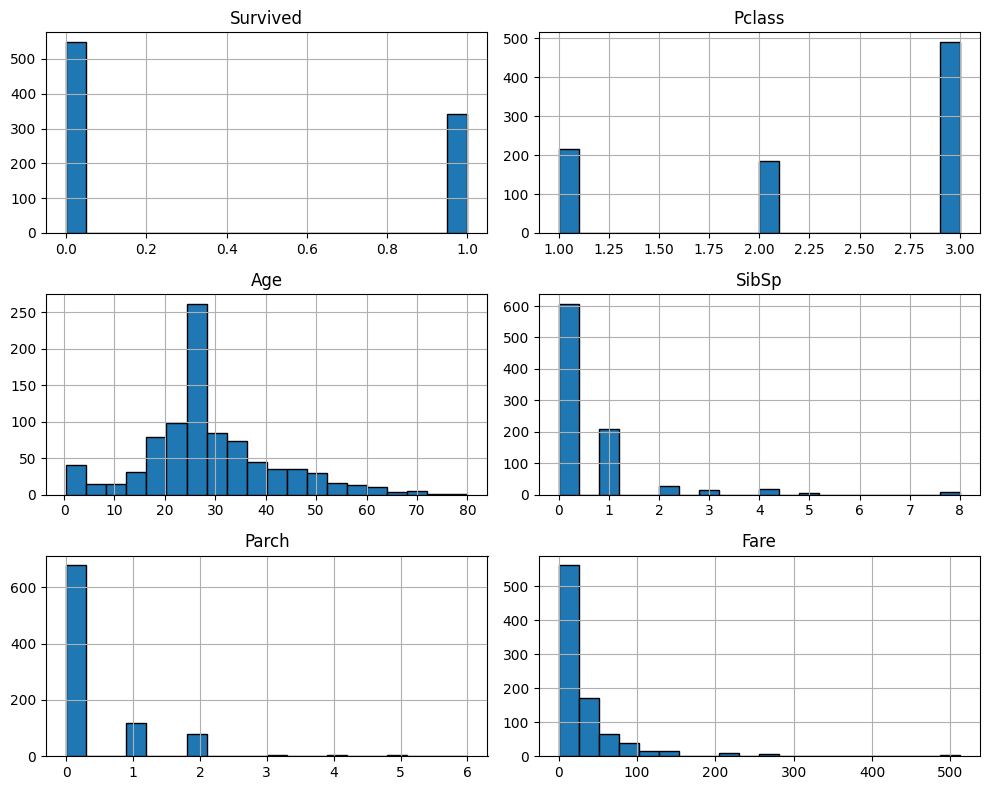

In [ ]:
#get numerical columns
numerical_columns = train_data.select_dtypes(include=['number'])

#plot histograms for each numerical variable
numerical_columns.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

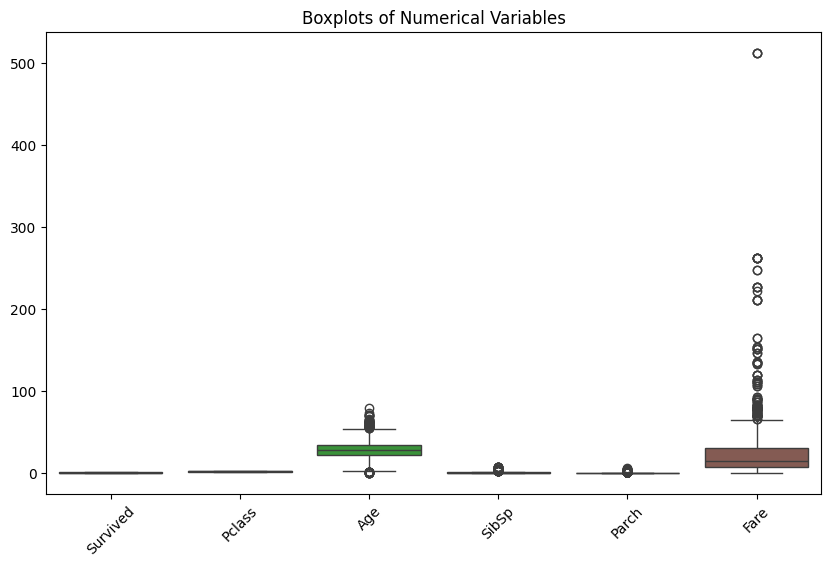

In [ ]:
#boxplot
plt.figure(figsize=(10, 6))
sb.boxplot(data=numerical_columns)
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Variables')
plt.show()


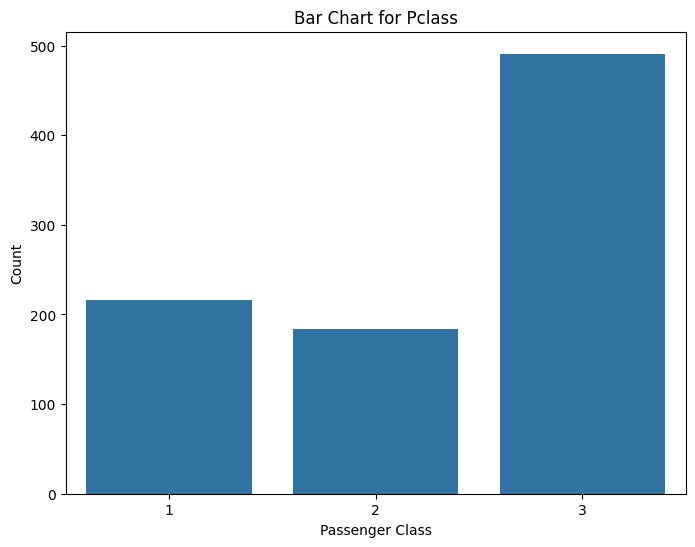

In [ ]:
#bar chart for passenger class
plt.figure(figsize=(8, 6))
sb.countplot(x='Pclass', data=train_data)
plt.title('Bar Chart for Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Investigate the relationship between values

In [ ]:
#correlation
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


We notice that there is a correlation of -0.33 on average between the Survived and the Pclass variable showcasing that the passengers of a higher societal class had more chance of surviving. Likely, we notice a correlation of 0.26 between the Survived variable and the Fare one which comes to add up to this hypothesis. We also notice a slight correlation between Survival and Parch showcasing that passengers with parents or with kids have a slightly higher chance of survival. However the correlation between survival and spouses/siblings is close to 0 showcasing that it almost doesnt have any impact. Likely, the correlation being close to 0 between Age and Survived showcases that the age almost doesnt matter. Pclass and Fare are therefore the one that are the most linked to the survival and it makes sense knowing that the higher class passengers had more chances to be rescued.

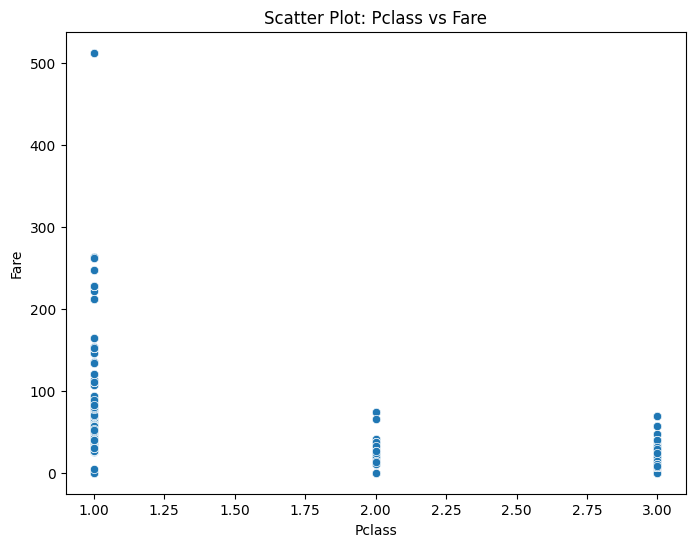

In [ ]:
#scatter plot between Pclass and Fare
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Pclass', y='Fare', data=train_data)
plt.title('Scatter Plot: Pclass vs Fare')
plt.show()

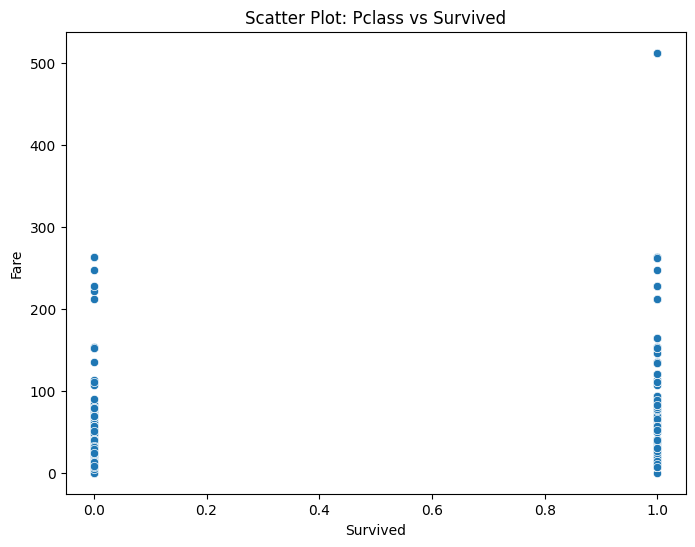

In [ ]:
#scatter plot between Survival and Pclass
plt.figure(figsize=(8, 6))
sb.scatterplot(x='Survived', y='Fare', data=train_data)
plt.title('Scatter Plot: Pclass vs Survived')
plt.show()

Analyze categorical variables.

In [ ]:
#frequency counts for 'Sex' and 'Embarked'
print("Frequency counts for 'Sex':")
print(train_data['Sex'].value_counts())
print("\nFrequency counts for 'Embarked':")
print(train_data['Embarked'].value_counts())


Frequency counts for 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Frequency counts for 'Embarked':
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


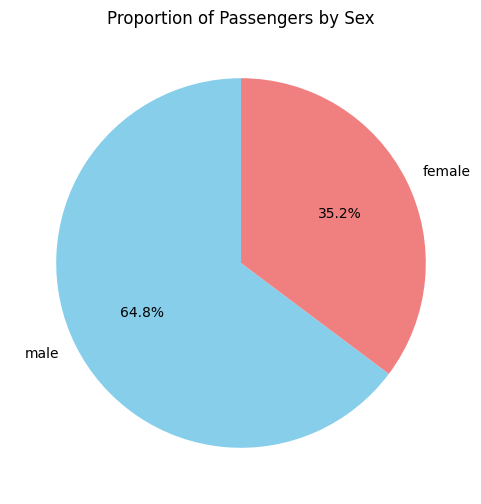

In [ ]:
#pie chart for 'Sex'
plt.figure(figsize=(6, 6))
train_data['Sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Proportion of Passengers by Sex')
plt.ylabel('')
plt.show()


<ipython-input-27-2345f8ff31ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Embarked', data=train_data, palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 l

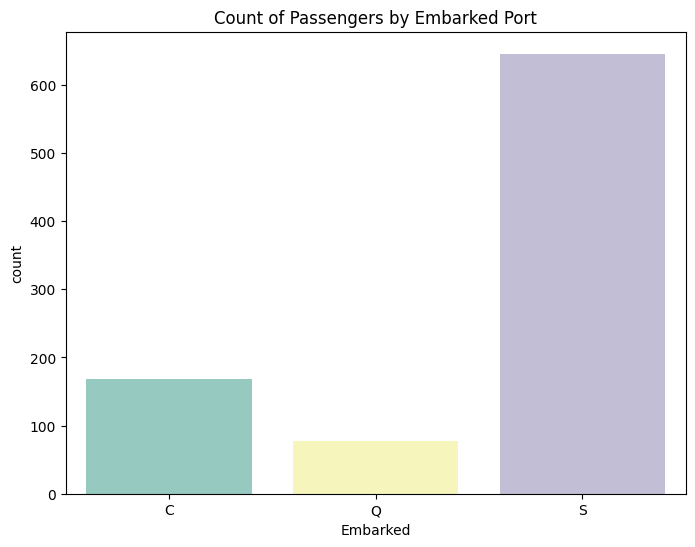

In [ ]:
#count plot for 'Embarked'
plt.figure(figsize=(8, 6))
sb.countplot(x='Embarked', data=train_data, palette='Set3')
plt.title('Count of Passengers by Embarked Port')
plt.show()

Most Passengers have embarqued from Southampon which makes sense as it was the place from which the ferry first departed

In [ ]:
#turn Pclass and Survived into categorical types
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Survived'] = train_data['Survived'].astype('category')


<ipython-input-29-10b5b2e0feb1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Pclass', data=train_data, palette='Set1')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 lis

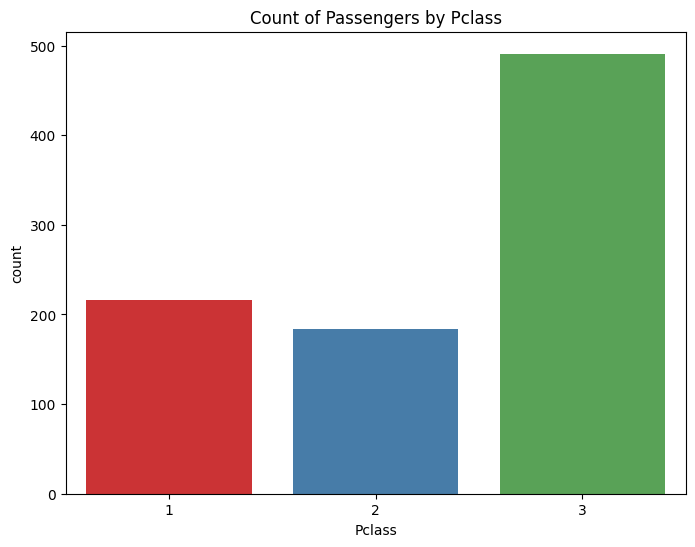

In [ ]:
#count plot for 'Pclass'
plt.figure(figsize=(8, 6))
sb.countplot(x='Pclass', data=train_data, palette='Set1')
plt.title('Count of Passengers by Pclass')
plt.show()



It is interesting that there were the most that came from a lower societal ranking yet it was the higher class that survived the most

<ipython-input-30-e7a85016e96a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='Survived', data=train_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


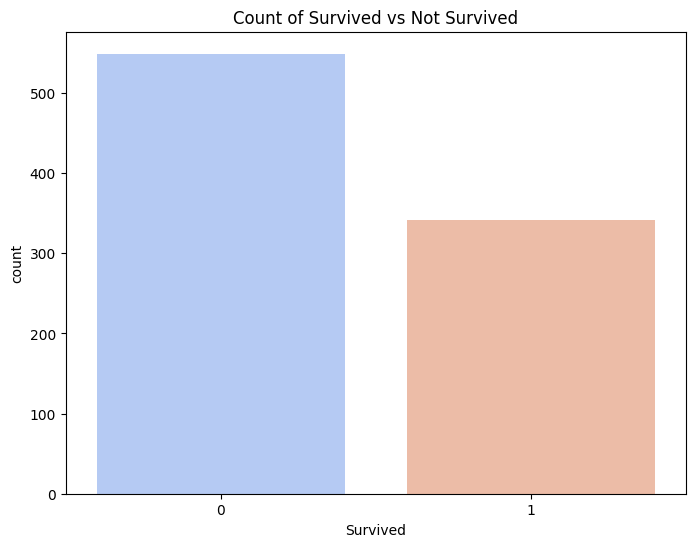

In [ ]:
#count plot for 'Survived'
plt.figure(figsize=(8, 6))
sb.countplot(x='Survived', data=train_data, palette='coolwarm')
plt.title('Count of Survived vs Not Survived')
plt.show()

There were more deaths than people rescued

Relationships between categorical variables and the Survived variable

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


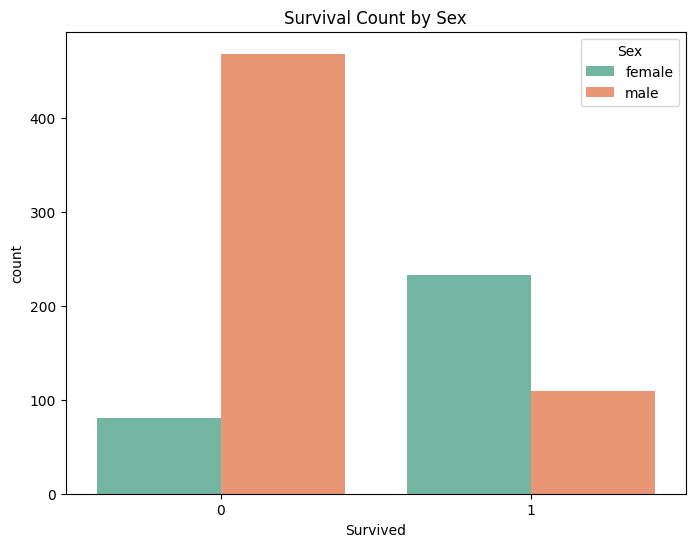

In [ ]:
#count plot for 'Survived' by 'Sex'
plt.figure(figsize=(8, 6))
sb.countplot(x='Survived', hue='Sex', data=train_data, palette='Set2')
plt.title('Survival Count by Sex')
plt.show()


It is interesting to note how most people that have survived are women as it is known that women and children were saved first which is confirmed here

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


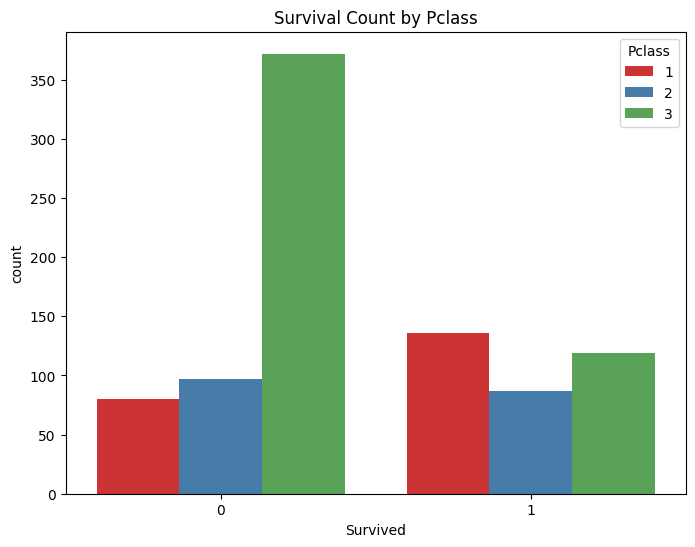

In [ ]:
#count plot for 'Survived' by 'Pclass'
plt.figure(figsize=(8, 6))
sb.countplot(x='Survived', hue='Pclass', data=train_data, palette='Set1')
plt.title('Survival Count by Pclass')
plt.show()


Once again, we can link the survival with the class of the passenger. The higher the class the more money and influence they have and therefore the higher are the chances to be saved.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


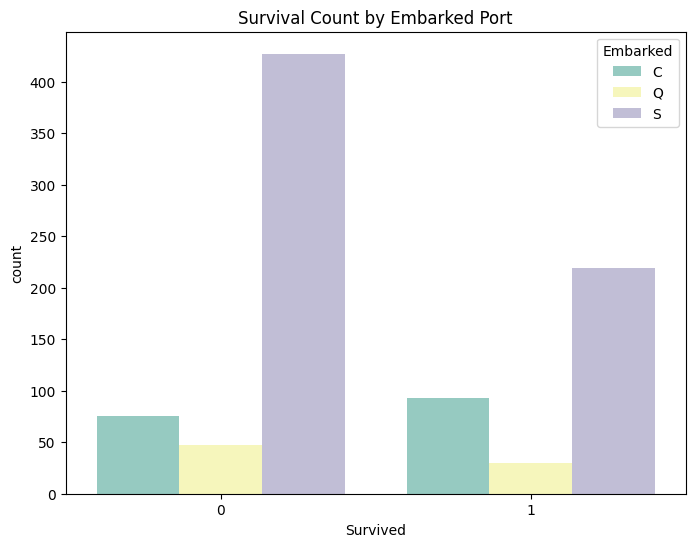

In [ ]:
#count plot for 'Survived' by 'Embarked'
plt.figure(figsize=(8, 6))
sb.countplot(x='Survived', hue='Embarked', data=train_data, palette='Set3')
plt.title('Survival Count by Embarked Port')
plt.show()


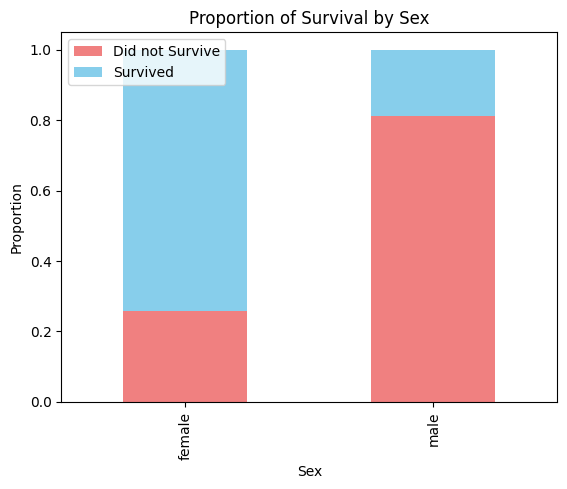

In [ ]:
#crosstab for Survival by Sex
survival_by_sex = pd.crosstab(train_data['Sex'], train_data['Survived'], normalize='index')

#stacked bar plot
survival_by_sex.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Proportion of Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(['Did not Survive', 'Survived'], loc='upper left')
plt.show()


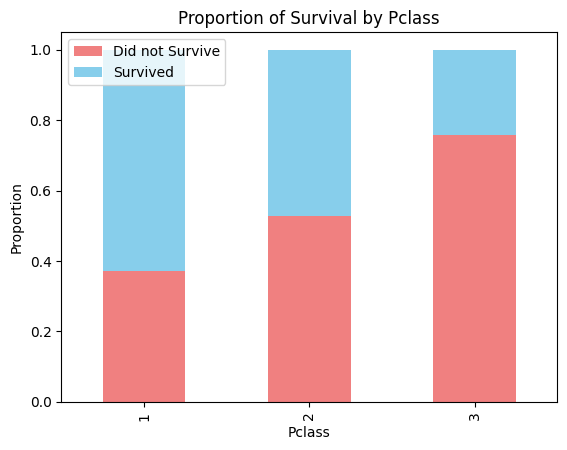

In [ ]:
#crosstab for Survival by Pclass
survival_by_pclass = pd.crosstab(train_data['Pclass'], train_data['Survived'], normalize='index')

#stacked bar plot
survival_by_pclass.plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Proportion of Survival by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Proportion')
plt.legend(['Did not Survive', 'Survived'], loc='upper left')
plt.show()


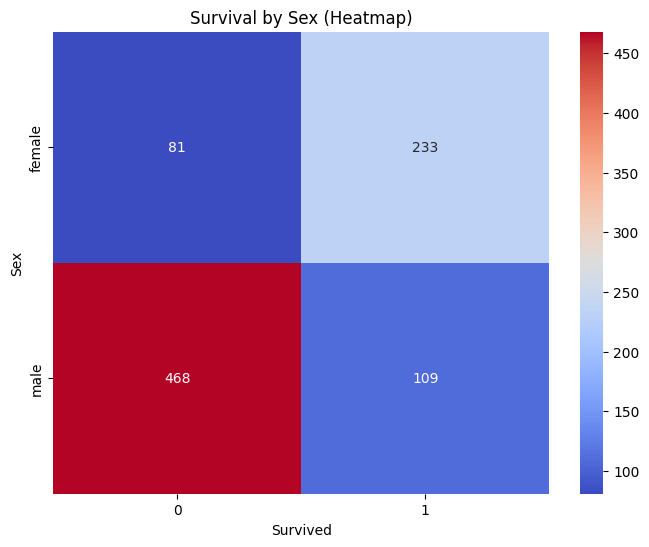

In [ ]:
#heatmap for Sex vs Survived
cross_tab_sex = pd.crosstab(train_data['Sex'], train_data['Survived'])
plt.figure(figsize=(8, 6))
sb.heatmap(cross_tab_sex, annot=True, fmt='d', cmap='coolwarm')
plt.title('Survival by Sex (Heatmap)')
plt.show()


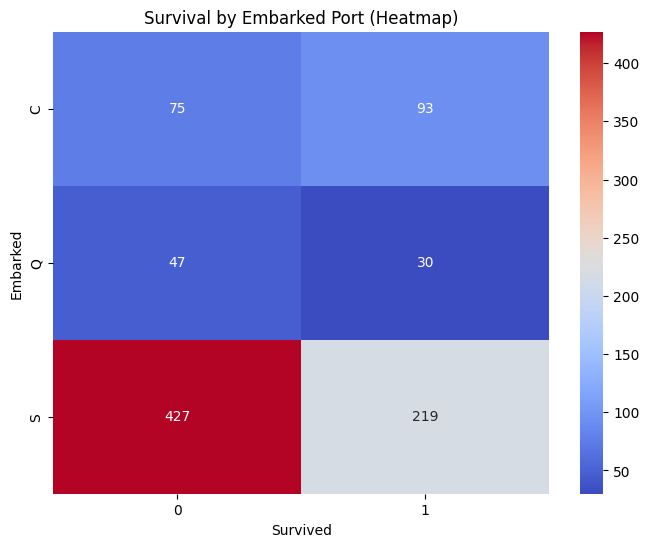

In [ ]:
#heatmap for Embarked vs Survived
cross_tab_embarked = pd.crosstab(train_data['Embarked'], train_data['Survived'])
plt.figure(figsize=(8, 6))
sb.heatmap(cross_tab_embarked, annot=True, fmt='d', cmap='coolwarm')
plt.title('Survival by Embarked Port (Heatmap)')
plt.show()



Use pivot tables or groupby functions to summarize the data and extract insights.

In [ ]:
#convert the 'Survived' column back to int
train_data['Survived'] = train_data['Survived'].astype(int)


categorical_columns = ['Sex', 'Embarked', 'Pclass']

#survival rate
for col in categorical_columns:
    survival_rate = train_data.groupby(col)['Survived'].mean()
    print(f"Survival rate by {col}:")
    print(survival_rate)
    print()



Survival rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival rate by Embarked:
Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64



<ipython-input-39-cbed6f3cf6e1>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train_data.groupby(col)['Survived'].mean()


This comes to validate all our assumptions : the survivors were mostly females and the higher class

In [ ]:
#convert numerical columns into bins
train_data['Age_bin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5)  # Using quintiles to bin Fare into 5 equal groups


numerical_columns = ['Pclass', 'SibSp', 'Parch', 'Age_bin', 'Fare_bin']

#survival rate by numerical variables
for col in numerical_columns:
    survival_rate = train_data.groupby(col)['Survived'].mean()
    print(f"Survival rate by {col}:")
    print(survival_rate)
    print()


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by SibSp:
SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Survival rate by Parch:
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Survival rate by Age_bin:
Age_bin
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64

Survival rate by Fare_bin:
Fare_bin
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64



<ipython-input-40-44f1843a51ed>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate = train_data.groupby(col)['Survived'].mean()


We can add to our analysis that the passengers with one sibling/spouse had higher chances of surviving as well as the ones who had kids and the children have more chances to be rescued as well